# Tutorial de Geopandas


### Graficando datos espaciales usando Python

#### Paso1: Conseguir datos espaciales
Recientemente el portal de datos abiertos de la CDMX libero los datos de "Carpetas de investigación PGJ de la Ciudad de México" que podemos descargar directamente de la liga:

[Portal de Datos Abiertos](https://datos.cdmx.gob.mx/explore/dataset/carpetas-de-investigacion-pgj-cdmx/export/)

#### Paso2: Importar datos a Python


In [1]:
#de una vez importamos todas las librerias que vamos a usar
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point


In [2]:
df = pd.read_csv("/Users/bruno/Downloads/carpetas-de-investigacion-pgj-cdmx.csv", delimiter = ';')
print(df.shape)
df.head()

(681549, 16)


,Año,Mes,Alcaldía,Categoría de delito,Delito,Agencia,Unidad de investigación,Fecha inicio,Fiscalía,Calle1,Calle2,Colonia,Latitud,Longitud,Mes y año,Geopoint
0,2018,Julio,IZTACALCO,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,ROBO DE MOTOCICLETA SIN VIOLENCIA,IZC-2,UI-3SD,2018-07-22T10:51:41-05:00,INVESTIGACIÓN EN IZTACALCO,AVENIDA JAVIER ROJO GÓMEZ,NaN,AGRÍCOLA ORIENTAL,19.391237,-99.074073,2018-07,"19.391236926, -99.0740725583"
1,2018,Julio,CUAJIMALPA DE MORELOS,DELITO DE BAJO IMPACTO,USO DE DOCUMENTO FALSO,CJ-1,UI-1SD,2018-07-22T10:52:16-05:00,INVESTIGACIÓN EN CUAJIMALPA,AV. VASCO DE QUIROGA,NaN,LA ROSITA,19.362801,-99.274524,2018-07,"19.3628010029, -99.2745241563"
2,2018,Julio,CUAUHTEMOC,DELITO DE BAJO IMPACTO,ABUSO DE AUTORIDAD,B,UI-3CD,2018-07-22T10:55:23-05:00,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,ALLENDE,REFORMA,CENTRO,19.442361,-99.137113,2018-07,"19.4423612777, -99.1371129267"
3,2018,Julio,TLAHUAC,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,TLH-1,UI-3SD,2018-07-22T10:57:20-05:00,INVESTIGACIÓN EN TLAHUAC,CERRADA GITANA,SAN RAFAEL ATLIXO,LA NOPALERA,19.300060,-99.053538,2018-07,"19.300059781, -99.0535382873"
4,2018,Julio,VENUSTIANO CARRANZA,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,VC-3,UI-1SD,2018-07-22T11:04:28-05:00,INVESTIGACIÓN EN VENUSTIANO CARRANZA,GUILLERMO PRIETO NUMERO 57,NaN,JAMAICA,19.406882,-99.124213,2018-07,"19.4068823719, -99.1242125382"


#### Paso3: Conevertir el DataFrame a un GeoDataFrame


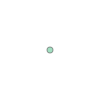

In [3]:
#Para pasar a un data frame espacial con geopandas, necesitamos convertir a geometrias con shapely
Point([19.39,-99.07])

In [4]:
#crs es la proyeccion, para latitud y longitud siempre podemos usar 4326
#con la lista estamos creando pares de longitud y latitud que pasamos a puntos con la clase Point de shapely

gf = gpd.GeoDataFrame(df.drop("Geopoint", axis = 1),
                      crs = {"init":"epsg:4326"},
                      geometry = [Point(p) for p in zip(df.Longitud, df.Latitud)])

In [68]:
gf.head()

,Año,Mes,Alcaldía,Categoría de delito,Delito,Agencia,Unidad de investigación,Fecha inicio,Fiscalía,Calle1,Calle2,Colonia,Latitud,Longitud,Mes y año,geometry
0,2018,Julio,IZTACALCO,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,ROBO DE MOTOCICLETA SIN VIOLENCIA,IZC-2,UI-3SD,2018-07-22T10:51:41-05:00,INVESTIGACIÓN EN IZTACALCO,AVENIDA JAVIER ROJO GÓMEZ,NaN,AGRÍCOLA ORIENTAL,19.391237,-99.074073,2018-07,POINT (-99.07407255832929 19.391236925963)
1,2018,Julio,CUAJIMALPA DE MORELOS,DELITO DE BAJO IMPACTO,USO DE DOCUMENTO FALSO,CJ-1,UI-1SD,2018-07-22T10:52:16-05:00,INVESTIGACIÓN EN CUAJIMALPA,AV. VASCO DE QUIROGA,NaN,LA ROSITA,19.362801,-99.274524,2018-07,POINT (-99.27452415631821 19.3628010029012)
2,2018,Julio,CUAUHTEMOC,DELITO DE BAJO IMPACTO,ABUSO DE AUTORIDAD,B,UI-3CD,2018-07-22T10:55:23-05:00,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,ALLENDE,REFORMA,CENTRO,19.442361,-99.137113,2018-07,POINT (-99.13711292667161 19.4423612776808)
3,2018,Julio,TLAHUAC,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,TLH-1,UI-3SD,2018-07-22T10:57:20-05:00,INVESTIGACIÓN EN TLAHUAC,CERRADA GITANA,SAN RAFAEL ATLIXO,LA NOPALERA,19.300060,-99.053538,2018-07,POINT (-99.0535382872759 19.3000597809876)
4,2018,Julio,VENUSTIANO CARRANZA,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,VC-3,UI-1SD,2018-07-22T11:04:28-05:00,INVESTIGACIÓN EN VENUSTIANO CARRANZA,GUILLERMO PRIETO NUMERO 57,NaN,JAMAICA,19.406882,-99.124213,2018-07,POINT (-99.12421253823179 19.4068823718914)


In [70]:
gf["Año"].unique()

array([2018, 2016, 2017])

### Paso4: EDA

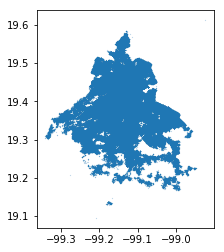

In [6]:
#Podemos graficar muy rapido con geopandas, pero son tantos los crimenes que practicamente se colorea toda la CDMX

gf.plot(markersize = 0.01)

16


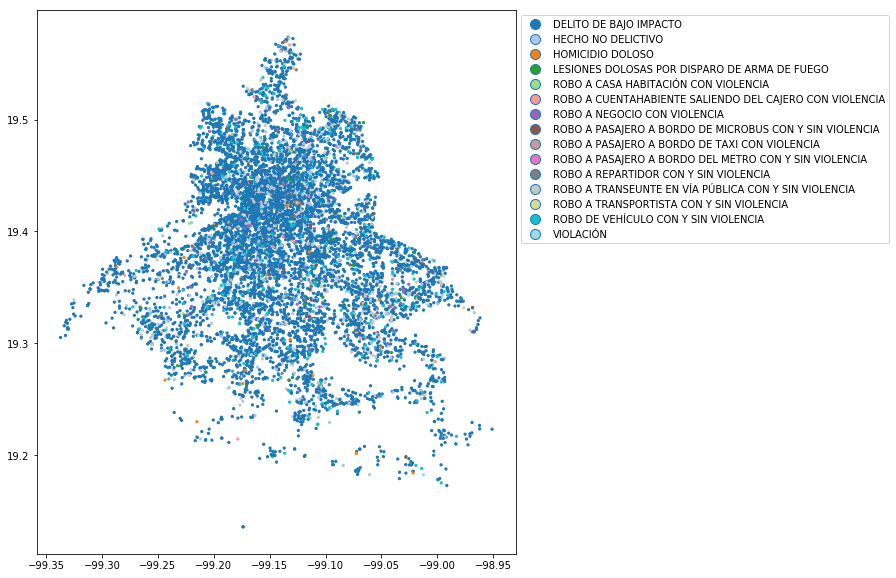

In [30]:
#podemos separar los delitos por categoria y hacer los colores de cada categoria distintos,
#vamos a graficar solo una parte de los datos para que sea rapido

print(gf["Categoría de delito"].nunique())

fig, ax = plt.subplots(figsize=(10,10))
gf.head(10000).plot(markersize = 5, column="Categoría de delito", cmap='tab20', legend = True, ax = ax)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 1))

### Paso5: Joins Espaciales
Tenemos tantos puntos que es dificil sacar conclusiones graficando todos al mismo tiempo
Vamos a intentar agruparlos en poligonos para tener mayor claridad

Para eso usamos un shapefile con los municipios de la CDMX

[Descargar shapefile de municipios](http://www.conabio.gob.mx/informacion/metadata/gis/muni_2012gw.xml?&_xsl=/db/metadata/xsl/fgdc_html.xsl)

In [39]:
muni = gpd.read_file("/Users/bruno/Downloads/muni_2012gw/Muni_2012gw.shp")
print(muni.shape)
muni.head()

(2457, 7)


,CVE_ENT,CVE_MUN,NOM_MUN,OID_1,cov_,cov_id,geometry
0,01,005,Jesús María,1,1,2,POLYGON ((-102.3356775711372 22.05066521496476...
1,01,011,San Francisco de los Romo,2,2,3,POLYGON ((-102.1527236904711 22.08962165184315...
2,01,001,Aguascalientes,3,3,4,POLYGON ((-102.1064122399267 22.06035441303122...
3,01,008,San José de Gracia,4,4,5,POLYGON ((-102.4561096056242 22.32323223869171...
4,01,007,Rincón de Romos,5,5,6,"POLYGON ((-102.226841597708 22.37392855834552,..."


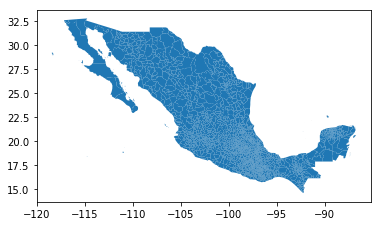

In [40]:
muni.plot()

(16, 7)
    CVE_ENT CVE_MUN              NOM_MUN  OID_1  cov_  cov_id  \
336      09     002         Azcapotzalco    337   337     338   
337      09     005    Gustavo A. Madero    338   338     339   
338      09     016       Miguel Hidalgo    339   339     340   
339      09     006            Iztacalco    340   340     341   
340      09     017  Venustiano Carranza    341   341     342   

                                              geometry  
336  POLYGON ((-99.18244684291649 19.50756095368394...  
337  POLYGON ((-99.11788784658718 19.59059230135504...  
338  POLYGON ((-99.190444197047 19.47045898377894, ...  
339  POLYGON ((-99.05578649585527 19.42214108628177...  
340  POLYGON ((-99.10946105900705 19.45291794334054...  


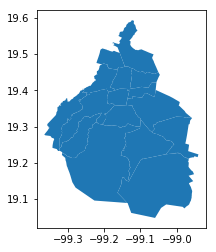

In [42]:
#Nos quedamos solo con los municipios (Delegaciones) de la CDMX:
muni = muni.loc[muni.CVE_ENT == "09"]
print(muni.shape)
print(muni.head())
muni.plot()

In [49]:
#Usamos un join espacial para juntar los datos de delitos con su respectiva delegacion
delegaciones_data = gpd.sjoin(muni,gf, how = "inner", op="contains")


In [50]:
delegaciones_data.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID_1,cov_,cov_id,geometry,index_right,Año,Mes,...,Agencia,Unidad de investigación,Fecha inicio,Fiscalía,Calle1,Calle2,Colonia,Latitud,Longitud,Mes y año
336,09,002,Azcapotzalco,337,337,338,POLYGON ((-99.18244684291649 19.50756095368394...,150890,2016,Junio,...,AZ-1,UI-1SD,2016-06-03T14:48:37-05:00,INVESTIGACIÓN EN AZCAPOTZALCO,EJE 1 PTE. (CALZ. VALLEJO),COLTONGO,COLTONGO,19.479187,-99.148507,2016-06
336,09,002,Azcapotzalco,337,337,338,POLYGON ((-99.18244684291649 19.50756095368394...,466188,2016,Septiembre,...,FDS-3,UI-FDS-3-02,2016-09-26T06:38:34-05:00,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,CALZADA COLTONGO,Y VALLEJO,COLTONGO,19.479187,-99.148507,2016-09
336,09,002,Azcapotzalco,337,337,338,POLYGON ((-99.18244684291649 19.50756095368394...,642188,2017,Octubre,...,AZ-1,UI-1SD,2017-10-11T09:30:20-05:00,INVESTIGACIÓN EN AZCAPOTZALCO,CALZ. COLTONGO,CALZ. VALLEJO,COLTONGO,19.479200,-99.148632,2017-10
336,09,002,Azcapotzalco,337,337,338,POLYGON ((-99.18244684291649 19.50756095368394...,678686,2016,Octubre,...,AZ-1,UI-3SD,2016-10-30T18:01:19-06:00,INVESTIGACIÓN EN AZCAPOTZALCO,AVENIDA COLTONGO,AVENIDA VALLEJO,COLTONGO,19.479247,-99.148487,2016-10
336,09,002,Azcapotzalco,337,337,338,POLYGON ((-99.18244684291649 19.50756095368394...,407152,2017,Julio,...,AZ-1,UI-1SD,2017-07-28T05:10:30-05:00,INVESTIGACIÓN EN AZCAPOTZALCO,CALZADA VALLEJO,COLTONGO,COLTONGO,19.479467,-99.148467,2017-07


In [58]:
#Ahora podemos ver cuantos crimenes hubo por delegacion
delegaciones_data.groupby("NOM_MUN").CVE_ENT.count().sort_values(ascending = False)

NOM_MUN
Cuauhtémoc                107269
Iztapalapa                 96501
Gustavo A. Madero          64647
Benito Juárez              58609
Coyoacán                   45034
Miguel Hidalgo             44287
Álvaro Obregón             42419
Tlalpan                    38133
Venustiano Carranza        37511
Azcapotzalco               33463
Iztacalco                  28383
Xochimilco                 20273
Tláhuac                    14654
La Magdalena Contreras      9847
Cuajimalpa de Morelos       9297
Milpa Alta                  4248
Name: CVE_ENT, dtype: int64

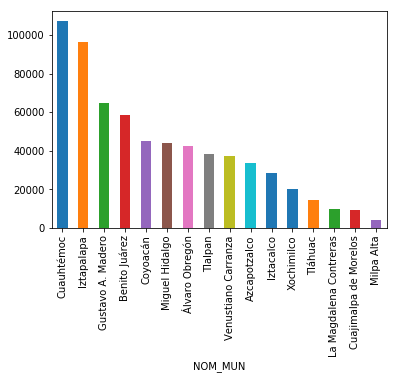

In [60]:
delegaciones_data.groupby("NOM_MUN").CVE_ENT.count().sort_values(ascending = False).plot.bar()

In [88]:
#lo mismo pero por categoria de crimen

delegaciones_data.groupby(["NOM_MUN","Categoría de delito"])[["CVE_ENT"]].count().unstack(1)

CVE_ENT                     \
Categoría de delito    DELITO DE BAJO IMPACTO HECHO NO DELICTIVO   
NOM_MUN                                                            
Azcapotzalco                          27256.0             1621.0   
Benito Juárez                         50495.0             3572.0   
Coyoacán                              37080.0             2992.0   
Cuajimalpa de Morelos                  8165.0              539.0   
Cuauhtémoc                            86040.0             8924.0   
Gustavo A. Madero                     48740.0             4422.0   
Iztacalco                             22310.0             2102.0   
Iztapalapa                            70828.0             6601.0   
La Magdalena Contreras                 8267.0              690.0   
Miguel Hidalgo                        36182.0             2604.0   
Milpa Alta                             3527.0              227.0   
Tlalpan                               31694.0             2224.0   
Tláhuac                               11145.0              806.0   
Venustiano Carranza                   28470.0             4027.0   
Xochimilco                            15449.0             1025.0   
Álvaro Obregón                        34476.0             3188.0   

                                         \
Categoría de delito    HOMICIDIO DOLOSO   
NOM_MUN                                   
Azcapotzalco                      115.0   
Benito Juárez                      51.0   
Coyoacán                          117.0   
Cuajimalpa de Morelos              28.0   
Cuauhtémoc                        325.0   
Gustavo A. Madero                 525.0   
Iztacalco                         122.0   
Iztapalapa                        694.0   
La Magdalena Contreras             50.0   
Miguel Hidalgo                    126.0   
Milpa Alta                         43.0   
Tlalpan                           196.0   
Tláhuac                           123.0   
Venustiano Carranza               218.0   
Xochimilco                        132.0   
Álvaro Obregón                    225.0   

                                                                      \
Categoría de delito    LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO   
NOM_MUN                                                                
Azcapotzalco                                                   154.0   
Benito Juárez                                                   84.0   
Coyoacán                                                       115.0   
Cuajimalpa de Morelos                                           23.0   
Cuauhtémoc                                                     331.0   
Gustavo A. Madero                                              325.0   
Iztacalco                                                      137.0   
Iztapalapa                                                     623.0   
La Magdalena Contreras                                          31.0   
Miguel Hidalgo                                                 157.0   
Milpa Alta                                                      14.0   
Tlalpan                                                        109.0   
Tláhuac                                                         78.0   
Venustiano Carranza                                            174.0   
Xochimilco                                                      67.0   
Álvaro Obregón                                                 159.0   

                                                             \
Categoría de delito    ROBO A CASA HABITACIÓN CON VIOLENCIA   
NOM_MUN                                                       
Azcapotzalco                                           90.0   
Benito Juárez                                          72.0   
Coyoacán                                               85.0   
Cuajimalpa de Morelos                                  34.0   
Cuauhtémoc                                             98.0   
Gustavo A. Madero                                     

### Paso6: Mapa Tematico (Cloropleth)


In [104]:
homicidios = delegaciones_data.groupby(["NOM_MUN","Categoría de delito","Año"])[["CVE_ENT"]].count().unstack([1,2]).iloc[:,6:9]
homicidios.columns = [2016,2017,2018]
homicidios["crecimiento"]=(homicidios[2018]-homicidios[2017])
homicidios.sort_values("crecimiento", ascending =False)

,2016,2017,2018,crecimiento
NOM_MUN,,,,
Iztapalapa,207.0,204.0,283.0,79.0
Gustavo A. Madero,130.0,173.0,222.0,49.0
Tlalpan,42.0,64.0,90.0,26.0
Iztacalco,37.0,33.0,52.0,19.0
Xochimilco,37.0,38.0,57.0,19.0
Tláhuac,37.0,35.0,51.0,16.0
Azcapotzalco,30.0,37.0,48.0,11.0
Cuauhtémoc,95.0,110.0,120.0,10.0
La Magdalena Contreras,14.0,14.0,22.0,8.0


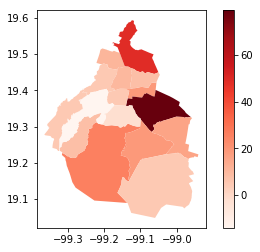

In [106]:
(muni.merge(homicidios, how = "inner", left_on = "NOM_MUN", right_index = True)
.plot(column = "crecimiento", cmap='Reds', legend = True))